# EyeT4Empathy dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
import glob
import sys


from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, LeaveOneOut, cross_val_score, GroupKFold, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, median_absolute_error, explained_variance_score

import pickle

warnings.filterwarnings("ignore")


### Import the empathyhelper

In [2]:
import empathyhelper

In [3]:
from empathyhelper import preprocess_data, summarize_eye_tracking_data
from empathyhelper import uncertainty_diameters, plot_correlation_heatmap
from empathyhelper import  plot_actual_vs_predicted, train_and_evalute
print ("Import empathyhelper sucessfully")

Import empathyhelper sucessfully


# Read the data files Experiment 

Read all the files and store for the further usage

In [4]:
# Get a list of all the .csv files in the folder 
#[To learn more about your dataset, refer to the readme file in the repository and replace the path accordingly.]

filenames = glob.glob('D:/Extra/ahmed/MSc/Sesmester 2/Data Science/Assignment/Final Solution 1/EyeT/EyeT/*.csv')


#D:\Extra\ahmed\MSc\Semester 2\Data Science\Assignment\Final Solution 1\EyeT
Experiment_count = len(filenames) 
print ("eye-gaze trajectories : ", Experiment_count)

eye-gaze trajectories :  502


## Overall Pipeline

#### Apply the preprocessing and summarize the participant's trials

In [5]:
# Create an empty list to store the DataFrames
df_EyeT_list = []
iteration_number = 0

# Loop through data and read each .csv file into a DF
for filename in filenames:
    raw_data = pd.read_csv(filename, usecols=lambda column: column != 0, low_memory=True)
     
    # Apply the preprocessing function to the data
    processed_data = preprocess_data(raw_data)
    
    file_name = os.path.basename(filename)
       
    if file_name.startswith('EyeT_group_dataset_III_'):
        group = 'Test group experiment'
    elif file_name.startswith('EyeT_group_dataset_II_'):
        group = 'Control group experiment'
    
    # Apply the summarize_eye_tracking_data function to the data
    summary = summarize_eye_tracking_data(processed_data, group)
    df_EyeT_list.append(summary)
    
    iteration_number += 1

    
# Concat all the DF in a single DF
print("Summarize data sucessffully ....")
df_EyeT = pd.concat(df_EyeT_list, ignore_index=True)

Summarize data sucessffully ....


In [6]:
#Read all data files
df_EyeT.head()

,Participant Name,Project Name,Recording Name,Total Fixations,Avg. Fixation Duration,Pupil Diameter Mean,Pupil Diameter Median,Pupil Diameter Std,Gaze Point X Mean,Gaze Point X Median,Gaze Point X Std,Gaze Point Y Mean,Gaze Point Y Median,Gaze Point Y Std,Fixation Point X Mean,Fixation Point X Median,Fixation Point X Std,Fixation Point Y Mean,Fixation Point Y Median,Fixation Point Y Std
0,Participant0001,Test group experiment,Recording1,3959,271.230866,3.056368,3.055,0.146976,1070.355771,1024.0,273.425806,253.597742,263.0,293.880068,1068.048486,1025.0,267.415656,240.014733,283.0,273.403386
1,Participant0001,Test group experiment,Recording2,4235,224.831641,3.003070,3.015,0.129013,965.955342,965.0,306.457171,306.260339,324.0,273.827454,963.202383,963.0,313.929984,293.415570,316.0,286.250816
2,Participant0003,Test group experiment,Recording11,2070,157.457005,3.046213,3.050,0.199396,1017.325455,1000.0,304.629167,555.689808,608.0,301.311213,1025.024750,995.0,321.610589,511.385828,575.0,302.463961
3,Participant0003,Test group experiment,Recording12,3194,135.623043,2.930768,2.940,0.216362,984.012235,991.0,277.920121,588.452621,594.0,287.156051,966.134572,998.0,293.505633,583.479270,570.0,320.345364
4,Participant0003,Test group experiment,Recording13,2605,135.343954,2.854551,2.855,0.225505,1005.079682,994.0,303.708457,534.013693,541.0,291.773511,1014.128752,989.0,329.832332,500.207664,514.0,312.883568


# Exploratory Data Analysis

In [7]:

pd.set_option('display.max_rows', None)  # Show all rows

df_EyeT.head()

,Participant Name,Project Name,Recording Name,Total Fixations,Avg. Fixation Duration,Pupil Diameter Mean,Pupil Diameter Median,Pupil Diameter Std,Gaze Point X Mean,Gaze Point X Median,Gaze Point X Std,Gaze Point Y Mean,Gaze Point Y Median,Gaze Point Y Std,Fixation Point X Mean,Fixation Point X Median,Fixation Point X Std,Fixation Point Y Mean,Fixation Point Y Median,Fixation Point Y Std
0,Participant0001,Test group experiment,Recording1,3959,271.230866,3.056368,3.055,0.146976,1070.355771,1024.0,273.425806,253.597742,263.0,293.880068,1068.048486,1025.0,267.415656,240.014733,283.0,273.403386
1,Participant0001,Test group experiment,Recording2,4235,224.831641,3.003070,3.015,0.129013,965.955342,965.0,306.457171,306.260339,324.0,273.827454,963.202383,963.0,313.929984,293.415570,316.0,286.250816
2,Participant0003,Test group experiment,Recording11,2070,157.457005,3.046213,3.050,0.199396,1017.325455,1000.0,304.629167,555.689808,608.0,301.311213,1025.024750,995.0,321.610589,511.385828,575.0,302.463961
3,Participant0003,Test group experiment,Recording12,3194,135.623043,2.930768,2.940,0.216362,984.012235,991.0,277.920121,588.452621,594.0,287.156051,966.134572,998.0,293.505633,583.479270,570.0,320.345364
4,Participant0003,Test group experiment,Recording13,2605,135.343954,2.854551,2.855,0.225505,1005.079682,994.0,303.708457,534.013693,541.0,291.773511,1014.128752,989.0,329.832332,500.207664,514.0,312.883568


###### Get the count for Control group experiment and Test group experiment

In [8]:
# Count occurrences of each project name in the 'Project Name' column
project_counts = df_EyeT['Project Name'].value_counts()

# Print the counts for "Control group experiment" and "Test group experiment"
print(f'Control group experiment: {project_counts.get("Control group experiment", 0)}')
print(f'Test group experiment: {project_counts.get("Test group experiment", 0)}')

Control group experiment: 142
Test group experiment: 360


In [9]:
df_EyeT.describe()

,Total Fixations,Avg. Fixation Duration,Pupil Diameter Mean,Pupil Diameter Median,Pupil Diameter Std,Gaze Point X Mean,Gaze Point X Median,Gaze Point X Std,Gaze Point Y Mean,Gaze Point Y Median,Gaze Point Y Std,Fixation Point X Mean,Fixation Point X Median,Fixation Point X Std,Fixation Point Y Mean,Fixation Point Y Median,Fixation Point Y Std
count,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000
mean,5121.804781,320.871694,3.173988,3.158222,0.234660,923.285981,923.097610,279.284970,448.339797,453.477092,263.984316,924.914874,925.720120,268.667016,452.033705,456.316733,253.533741
std,3306.395421,148.527529,0.506284,0.504791,0.140840,79.442290,70.535395,57.166109,111.079774,129.147311,48.752133,83.141174,74.759113,67.888185,124.595834,141.850010,57.882347
min,86.000000,128.689189,1.663501,1.560000,0.091130,722.131808,521.000000,74.465079,126.130802,33.000000,75.999008,709.402528,519.000000,37.116274,92.052922,51.000000,50.883095
25%,2750.000000,226.378865,2.891573,2.880000,0.149947,864.999339,880.625000,246.333976,360.126144,351.000000,239.316822,871.058089,885.000000,234.694611,353.924966,346.250000,220.342216
50%,4235.000000,293.554707,3.061182,3.055000,0.199329,916.832980,919.000000,277.679647,458.373100,449.000000,265.869385,918.519809,917.000000,269.492978,460.838615,447.500000,258.349995
75%,6442.500000,377.788203,3.397512,3.330000,0.262802,968.486968,968.000000,311.732238,532.093230,548.750000,299.712629,964.012614,967.750000,313.929984,533.422764,558.000000,302.463961
max,16894.000000,1762.581701,5.676047,5.715000,1.179666,1263.553762,1255.000000,488.898311,807.105590,876.000000,431.907101,1302.523355,1345.000000,503.130855,882.295690,967.000000,365.617806


In [10]:
df_EyeT.shape

(502, 20)

In [11]:
df_EyeT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Participant Name         502 non-null    object 
 1   Project Name             502 non-null    object 
 2   Recording Name           502 non-null    object 
 3   Total Fixations          502 non-null    int64  
 4   Avg. Fixation Duration   502 non-null    float64
 5   Pupil Diameter Mean      502 non-null    float64
 6   Pupil Diameter Median    502 non-null    float64
 7   Pupil Diameter Std       502 non-null    float64
 8   Gaze Point X Mean        502 non-null    float64
 9   Gaze Point X Median      502 non-null    float64
 10  Gaze Point X Std         502 non-null    float64
 11  Gaze Point Y Mean        502 non-null    float64
 12  Gaze Point Y Median      502 non-null    float64
 13  Gaze Point Y Std         502 non-null    float64
 14  Fixation Point X Mean    5

#### Read the Empathy score from questionare

Our target is the empathy score, and we will be utilizing the total score extended because it contains additional questions that are more precise in measuring empathy.

In [12]:

df_score = pd.read_csv('D:/Extra/ahmed/MSc/Sesmester 2/Data Science/Assignment/Final Solution 1/Empthy Score/Questionnaire_datasetIB.csv', encoding='cp1252')

In [13]:
df_score.describe()

,NR,I sometimes find it difficult to see things from the ‘other guy’s’ point of view.,"I am usually objective when I watch a film or play, and I don’t often get completely caught up in it.",I try to look at everybody’s side of a disagreement before I make a decision.,I sometimes try to understand my friends better by imagining how things look from their perspective.,"When I am upset at someone, I usually try to ‘put myself in his shoes for a while.","Before criticising somebody, I try to imagine how I would feel if I was in their place.",I often get emotionally involved with my friends’ problems.,I am inclined to get nervous when others around me seem to be nervous.,People I am with have a strong influence on my mood.,...,I complete the sentences of other people when they find it difficult to communicate their ideas to help them.,"If someone is suffering from stutter, I prefer speaking rather than texting.",I try to be patient when people speak with me very slowly.,"In a situation, when there are handicapped students in a classroom, the pace of the class should be adapted to the handicapped student.","In a situation, when there are only one handicapped student in a classroom, the pace of the class should be adapted to him/her independently of how many students are in the class.","I feel impatient when people communicate slowly, so I complete other people’s sentences to make the communication more efficient.",I believe that the handicapped students should catch the pace of the group in a classroom to not delay the progress of other students.,I feel left out (or excluded) when I cannot participate in a conversation.,Total Score extended,Total Score original
count,6.000000e+01,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,...,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,1.289288e+07,2.133333,2.616667,2.833333,2.933333,2.750000,2.900000,2.850000,2.650000,2.750000,...,2.866667,2.350000,2.966667,2.866667,2.566667,2.533333,2.916667,2.850000,110.500000,85.650000
std,2.072411e+06,0.891897,0.783120,0.994334,0.954324,1.018889,1.003384,0.879619,0.732421,1.035391,...,0.947193,0.860134,0.990919,0.947193,0.945402,0.891897,0.869281,0.860134,21.611751,17.760006
min,9.534500e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,53.000000,40.000000
25%,1.224328e+07,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,96.500000,73.000000
50%,1.256132e+07,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,114.500000,88.500000
75%,1.539043e+07,2.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,...,4.000000,3.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.250000,125.250000,97.250000
max,1.601695e+07,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,151.000000,117.000000


In [14]:
df_score.head()

,Participant nr,NR,Created,Modified,I have read and understood the information about the study and all the information in this form is explained to me and I am willing to participate,I want to participate.,I sometimes find it difficult to see things from the ‘other guy’s’ point of view.,"I am usually objective when I watch a film or play, and I don’t often get completely caught up in it.",I try to look at everybody’s side of a disagreement before I make a decision.,I sometimes try to understand my friends better by imagining how things look from their perspective.,...,"If someone is suffering from stutter, I prefer speaking rather than texting.",I try to be patient when people speak with me very slowly.,"In a situation, when there are handicapped students in a classroom, the pace of the class should be adapted to the handicapped student.","In a situation, when there are only one handicapped student in a classroom, the pace of the class should be adapted to him/her independently of how many students are in the class.","I feel impatient when people communicate slowly, so I complete other people’s sentences to make the communication more efficient.",I believe that the handicapped students should catch the pace of the group in a classroom to not delay the progress of other students.,I feel left out (or excluded) when I cannot participate in a conversation.,Total Score extended,Total Score original,Elapsed time
0,Participant0001,9534500,24.09.2020 16:00,24.09.2020 16:00,Yes,Proceed,1,3,4,4,...,1,4,4,4,1,2,4,137,109,5 minutes 5 seconds
1,Participant0002,9597659,30.09.2020 15:14,30.09.2020 15:14,Yes,Proceed,2,2,4,4,...,2,4,3,3,4,2,2,127,100,5 minutes 55 seconds
2,Participant0003,9637453,01.10.2020 16:20,01.10.2020 16:20,Yes,Proceed,4,1,4,4,...,3,3,3,2,3,3,2,123,98,6 minutes 49 seconds
3,Participant0004,9732460,06.10.2020 16:45,06.10.2020 16:45,Yes,Proceed,2,3,3,3,...,2,3,4,3,2,4,2,120,95,8 minutes 39 seconds
4,Participant0005,9732853,06.10.2020 17:24,06.10.2020 17:24,Yes,Proceed,2,3,4,3,...,3,4,2,1,4,3,4,124,97,7 minutes 27 seconds


#### Merge both dataframes into a single dataframe with an empty target score

In [15]:
# merge the data features on columns 'Participant name' and 'Participant nr'

result_I = pd.merge(df_EyeT, df_score[['Participant nr', 'Total Score extended']], left_on='Participant Name', right_on='Participant nr', how='left')

# Drop the 'column_name_df2' column as it's not needed anymore
result_I.drop(columns=['Participant nr'], inplace=True)
print ("Gracefully Merge a Dataframe.")

Gracefully Merge a Dataframe.


In [16]:
result_I.head()

,Participant Name,Project Name,Recording Name,Total Fixations,Avg. Fixation Duration,Pupil Diameter Mean,Pupil Diameter Median,Pupil Diameter Std,Gaze Point X Mean,Gaze Point X Median,...,Gaze Point Y Mean,Gaze Point Y Median,Gaze Point Y Std,Fixation Point X Mean,Fixation Point X Median,Fixation Point X Std,Fixation Point Y Mean,Fixation Point Y Median,Fixation Point Y Std,Total Score extended
0,Participant0001,Test group experiment,Recording1,3959,271.230866,3.056368,3.055,0.146976,1070.355771,1024.0,...,253.597742,263.0,293.880068,1068.048486,1025.0,267.415656,240.014733,283.0,273.403386,137
1,Participant0001,Test group experiment,Recording2,4235,224.831641,3.003070,3.015,0.129013,965.955342,965.0,...,306.260339,324.0,273.827454,963.202383,963.0,313.929984,293.415570,316.0,286.250816,137
2,Participant0003,Test group experiment,Recording11,2070,157.457005,3.046213,3.050,0.199396,1017.325455,1000.0,...,555.689808,608.0,301.311213,1025.024750,995.0,321.610589,511.385828,575.0,302.463961,123
3,Participant0003,Test group experiment,Recording12,3194,135.623043,2.930768,2.940,0.216362,984.012235,991.0,...,588.452621,594.0,287.156051,966.134572,998.0,293.505633,583.479270,570.0,320.345364,123
4,Participant0003,Test group experiment,Recording13,2605,135.343954,2.854551,2.855,0.225505,1005.079682,994.0,...,534.013693,541.0,291.773511,1014.128752,989.0,329.832332,500.207664,514.0,312.883568,123


In [17]:
result_I.describe()

,Total Fixations,Avg. Fixation Duration,Pupil Diameter Mean,Pupil Diameter Median,Pupil Diameter Std,Gaze Point X Mean,Gaze Point X Median,Gaze Point X Std,Gaze Point Y Mean,Gaze Point Y Median,Gaze Point Y Std,Fixation Point X Mean,Fixation Point X Median,Fixation Point X Std,Fixation Point Y Mean,Fixation Point Y Median,Fixation Point Y Std,Total Score extended
count,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000
mean,5121.804781,320.871694,3.173988,3.158222,0.234660,923.285981,923.097610,279.284970,448.339797,453.477092,263.984316,924.914874,925.720120,268.667016,452.033705,456.316733,253.533741,117.043825
std,3306.395421,148.527529,0.506284,0.504791,0.140840,79.442290,70.535395,57.166109,111.079774,129.147311,48.752133,83.141174,74.759113,67.888185,124.595834,141.850010,57.882347,18.529312
min,86.000000,128.689189,1.663501,1.560000,0.091130,722.131808,521.000000,74.465079,126.130802,33.000000,75.999008,709.402528,519.000000,37.116274,92.052922,51.000000,50.883095,53.000000
25%,2750.000000,226.378865,2.891573,2.880000,0.149947,864.999339,880.625000,246.333976,360.126144,351.000000,239.316822,871.058089,885.000000,234.694611,353.924966,346.250000,220.342216,108.000000
50%,4235.000000,293.554707,3.061182,3.055000,0.199329,916.832980,919.000000,277.679647,458.373100,449.000000,265.869385,918.519809,917.000000,269.492978,460.838615,447.500000,258.349995,121.000000
75%,6442.500000,377.788203,3.397512,3.330000,0.262802,968.486968,968.000000,311.732238,532.093230,548.750000,299.712629,964.012614,967.750000,313.929984,533.422764,558.000000,302.463961,128.000000
max,16894.000000,1762.581701,5.676047,5.715000,1.179666,1263.553762,1255.000000,488.898311,807.105590,876.000000,431.907101,1302.523355,1345.000000,503.130855,882.295690,967.000000,365.617806,151.000000


In [18]:
result_I.shape

(502, 21)

In [19]:
result_I.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 502 entries, 0 to 501
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Participant Name         502 non-null    object 
 1   Project Name             502 non-null    object 
 2   Recording Name           502 non-null    object 
 3   Total Fixations          502 non-null    int64  
 4   Avg. Fixation Duration   502 non-null    float64
 5   Pupil Diameter Mean      502 non-null    float64
 6   Pupil Diameter Median    502 non-null    float64
 7   Pupil Diameter Std       502 non-null    float64
 8   Gaze Point X Mean        502 non-null    float64
 9   Gaze Point X Median      502 non-null    float64
 10  Gaze Point X Std         502 non-null    float64
 11  Gaze Point Y Mean        502 non-null    float64
 12  Gaze Point Y Median      502 non-null    float64
 13  Gaze Point Y Std         502 non-null    float64
 14  Fixation Point X Mean    5

#### This is the final dataset to be used for further analysis

In [20]:
# Save the DataFrame as a CSV file
result_I.to_csv('output_data.csv', index=False)

In [21]:
result_I.head()

,Participant Name,Project Name,Recording Name,Total Fixations,Avg. Fixation Duration,Pupil Diameter Mean,Pupil Diameter Median,Pupil Diameter Std,Gaze Point X Mean,Gaze Point X Median,...,Gaze Point Y Mean,Gaze Point Y Median,Gaze Point Y Std,Fixation Point X Mean,Fixation Point X Median,Fixation Point X Std,Fixation Point Y Mean,Fixation Point Y Median,Fixation Point Y Std,Total Score extended
0,Participant0001,Test group experiment,Recording1,3959,271.230866,3.056368,3.055,0.146976,1070.355771,1024.0,...,253.597742,263.0,293.880068,1068.048486,1025.0,267.415656,240.014733,283.0,273.403386,137
1,Participant0001,Test group experiment,Recording2,4235,224.831641,3.003070,3.015,0.129013,965.955342,965.0,...,306.260339,324.0,273.827454,963.202383,963.0,313.929984,293.415570,316.0,286.250816,137
2,Participant0003,Test group experiment,Recording11,2070,157.457005,3.046213,3.050,0.199396,1017.325455,1000.0,...,555.689808,608.0,301.311213,1025.024750,995.0,321.610589,511.385828,575.0,302.463961,123
3,Participant0003,Test group experiment,Recording12,3194,135.623043,2.930768,2.940,0.216362,984.012235,991.0,...,588.452621,594.0,287.156051,966.134572,998.0,293.505633,583.479270,570.0,320.345364,123
4,Participant0003,Test group experiment,Recording13,2605,135.343954,2.854551,2.855,0.225505,1005.079682,994.0,...,534.013693,541.0,291.773511,1014.128752,989.0,329.832332,500.207664,514.0,312.883568,123


### Important Feature

We will now analyze the eye-tracking features in relation to empathy.

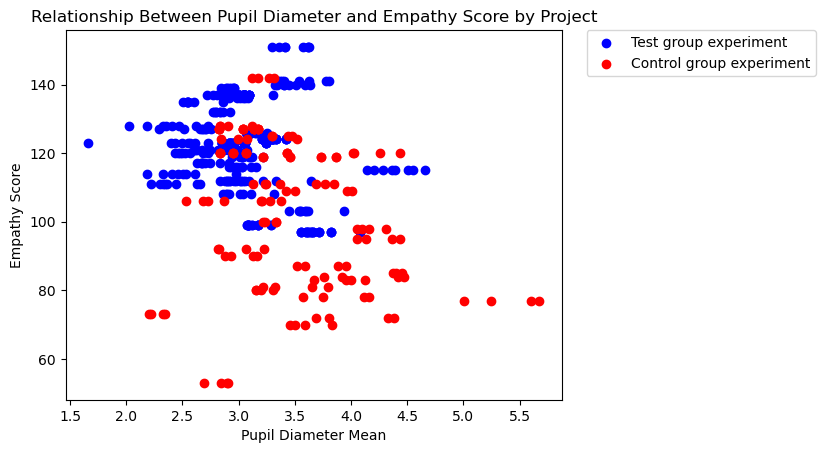

In [22]:
# Create a scatter plot with different colors for each project
unique_projects = result_I['Project Name'].unique()
colors = ['blue', 'red', 'green'] 

fig, ax = plt.subplots()

for project, color in zip(unique_projects, colors):
    project_data = result_I[result_I['Project Name'] == project]
    ax.scatter(project_data['Pupil Diameter Mean'], project_data['Total Score extended'], c=color, label=project)

# Add labels and title
ax.set_xlabel('Pupil Diameter Mean')
ax.set_ylabel('Empathy Score')
ax.set_title('Relationship Between Pupil Diameter and Empathy Score by Project')

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Show the plot
plt.show()

 scatter plot that displays the relationship between the total number of fixations and empathy score for each participant in the study, grouped by the project they belong to. Each point on the plot represents a participant.

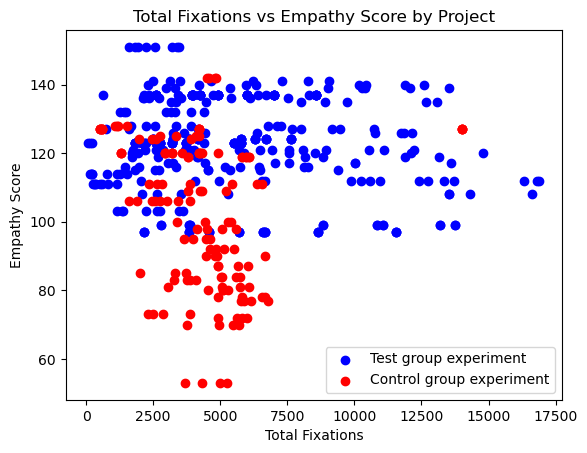

In [23]:
# Create a scatter plot with different colors for each project
unique_projects = result_I['Project Name'].unique()
colors = ['blue', 'red'] 

fig, ax = plt.subplots()

for project, color in zip(unique_projects, colors):
    project_data = result_I[result_I['Project Name'] == project]
    ax.scatter(project_data['Total Fixations'], project_data['Total Score extended'], c=color, label=project)

# Add labels and title
ax.set_xlabel('Total Fixations')
ax.set_ylabel('Empathy Score')
ax.set_title('Total Fixations vs Empathy Score by Project')

ax.legend()

plt.show()

### Typical diameters and uncertainties for each participant' trails

Most of the participants have different numbers of trials. Throughout these trials, they exhibit varying features, but we do not have a corresponding empathy score based on the environment.

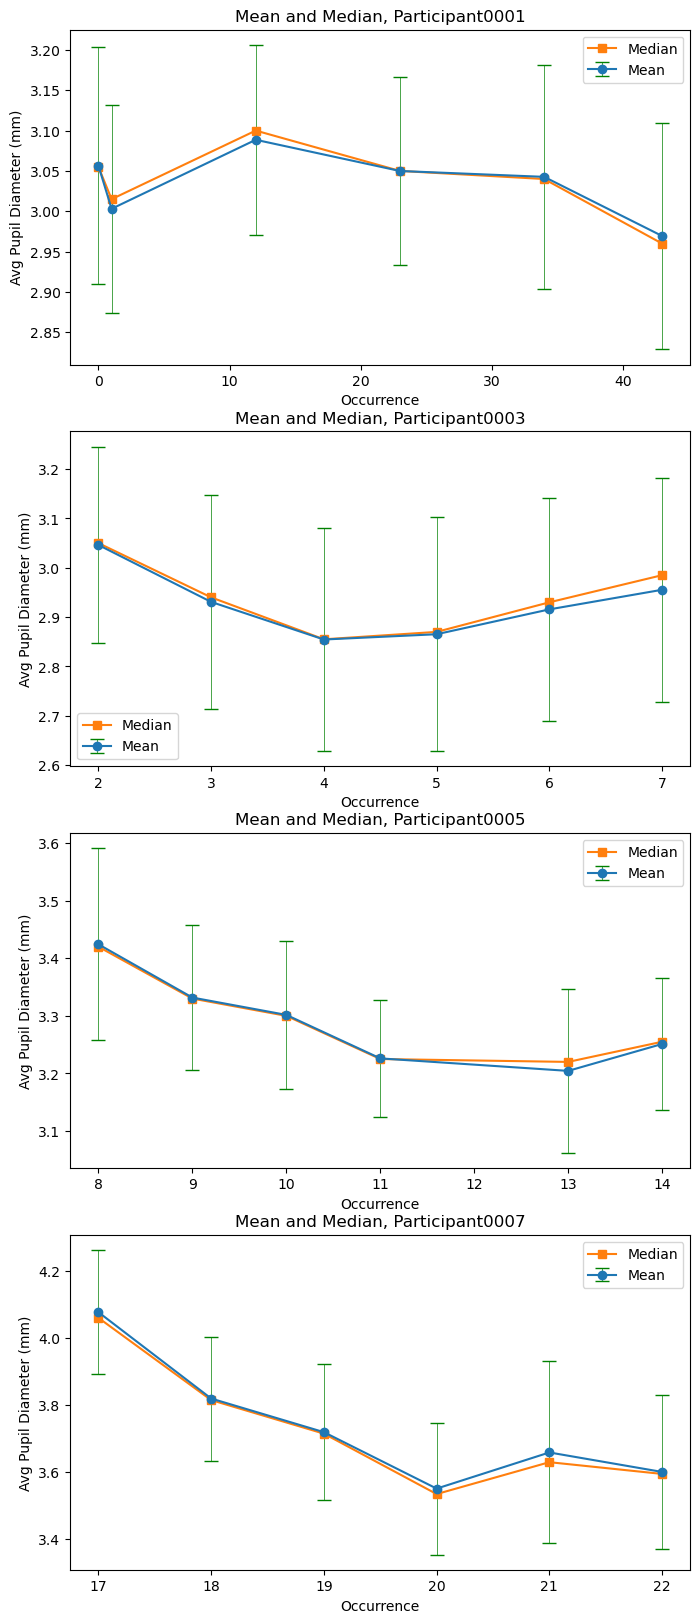

In [24]:
# Get unique participant names
unique_participants = result_I['Participant Name'].unique()

# Limit to the first 4 participants for the trend
unique_participants = unique_participants[:4]



# Create subplots
fig, axs = plt.subplots(nrows=len(unique_participants), figsize=(8, 5*len(unique_participants)))


for i, participant in enumerate(unique_participants):
    participant_data = result_I[result_I['Participant Name'] == participant]
    participant_data = participant_data.reset_index().rename(columns={'index': 'occurrence'}).head(6)

    grouped_data = participant_data.groupby('occurrence').agg({'Pupil Diameter Mean': 'mean', 'Pupil Diameter Median': 'mean', 'Pupil Diameter Std': 'mean'}).reset_index()

    ax = axs[i]

    ax.errorbar(grouped_data['occurrence'], grouped_data['Pupil Diameter Mean'], grouped_data['Pupil Diameter Std'], linestyle='-', marker='o', capsize=5, ecolor="green", elinewidth=0.5, label='Mean')

    ax.plot(grouped_data['occurrence'], grouped_data['Pupil Diameter Median'], linestyle='-', marker='s', label='Median')

    # Add labels and title
    ax.set_xlabel('Occurrence')
    ax.set_ylabel('Avg Pupil Diameter (mm)')
    ax.set_title(f'Mean and Median, {participant}')

    # Add legend
    ax.legend()

# Show the plot
plt.show()



#### Assess both the control and test groups separately

Since gaze typing involves significantly more eye involvement than the free-viewing group, it should be treated separately.

In [25]:
# Create a dictionary to store the DataFrames for each project
project_dfs = {}

# Iterate over each unique project name
for project in unique_projects:
    # Filter the data for the current project
    project_data = result_I[result_I['Project Name'] == project]

    # Add the filtered data to the dictionary with the project name as the key
    project_dfs[project] = project_data

In [26]:
# Access a specific project's DataFrame by its name
project_name = 'Control group experiment' 
control_df = project_dfs[project_name]
control_df.head()

,Participant Name,Project Name,Recording Name,Total Fixations,Avg. Fixation Duration,Pupil Diameter Mean,Pupil Diameter Median,Pupil Diameter Std,Gaze Point X Mean,Gaze Point X Median,...,Gaze Point Y Mean,Gaze Point Y Median,Gaze Point Y Std,Fixation Point X Mean,Fixation Point X Median,Fixation Point X Std,Fixation Point Y Mean,Fixation Point Y Median,Fixation Point Y Std,Total Score extended
360,Participant0010,Control group experiment,Recording1,5392,379.059162,3.232730,3.1925,0.237403,971.247027,975.0,...,441.096289,388.0,183.610188,973.921957,976.0,269.719731,440.103826,384.0,183.261750,100
361,Participant0010,Control group experiment,Recording2,5283,444.489495,3.212415,3.2000,0.219015,978.398370,1000.0,...,484.556360,430.0,232.864399,975.935718,988.0,285.409471,505.873218,497.0,234.490119,100
362,Participant0010,Control group experiment,Recording3,4444,324.807381,3.331669,3.3500,0.178924,998.712701,1005.0,...,554.162540,539.0,297.713544,1047.289042,1032.0,414.983677,513.659821,491.0,299.968004,100
363,Participant0010,Control group experiment,Recording4,3389,383.489230,3.335825,3.2850,0.163420,1003.353020,1024.0,...,587.964254,564.5,335.685098,1005.081311,1023.0,422.449168,602.277541,638.0,292.386144,100
364,Participant0014,Control group experiment,Recording2,1182,300.842640,2.836248,2.8300,0.273001,1016.897923,983.0,...,481.736213,477.0,187.390031,1003.519732,967.0,120.573719,503.638334,465.0,181.645100,128


In [27]:
# Access a specific project's DataFrame by its name
project_name = 'Test group experiment'  
test_df = project_dfs[project_name]
test_df.head()

,Participant Name,Project Name,Recording Name,Total Fixations,Avg. Fixation Duration,Pupil Diameter Mean,Pupil Diameter Median,Pupil Diameter Std,Gaze Point X Mean,Gaze Point X Median,...,Gaze Point Y Mean,Gaze Point Y Median,Gaze Point Y Std,Fixation Point X Mean,Fixation Point X Median,Fixation Point X Std,Fixation Point Y Mean,Fixation Point Y Median,Fixation Point Y Std,Total Score extended
0,Participant0001,Test group experiment,Recording1,3959,271.230866,3.056368,3.055,0.146976,1070.355771,1024.0,...,253.597742,263.0,293.880068,1068.048486,1025.0,267.415656,240.014733,283.0,273.403386,137
1,Participant0001,Test group experiment,Recording2,4235,224.831641,3.003070,3.015,0.129013,965.955342,965.0,...,306.260339,324.0,273.827454,963.202383,963.0,313.929984,293.415570,316.0,286.250816,137
2,Participant0003,Test group experiment,Recording11,2070,157.457005,3.046213,3.050,0.199396,1017.325455,1000.0,...,555.689808,608.0,301.311213,1025.024750,995.0,321.610589,511.385828,575.0,302.463961,123
3,Participant0003,Test group experiment,Recording12,3194,135.623043,2.930768,2.940,0.216362,984.012235,991.0,...,588.452621,594.0,287.156051,966.134572,998.0,293.505633,583.479270,570.0,320.345364,123
4,Participant0003,Test group experiment,Recording13,2605,135.343954,2.854551,2.855,0.225505,1005.079682,994.0,...,534.013693,541.0,291.773511,1014.128752,989.0,329.832332,500.207664,514.0,312.883568,123


#### Another dataset for pupil only

The analysis of empathy may rely on pupil features. This approach involves focusing exclusively on the pupil to predict empathy and disregarding other features that may be less reliable or less relevant. This approach will provide a comprehensive understanding of empathy and allow for more accurate predictions. Overall, utilizing pupil features will enable a focused and detailed analysis of empathy

In [28]:
pupil_test_df = test_df.loc[:, ['Participant Name', 'Pupil Diameter Mean', 'Pupil Diameter Median', 'Pupil Diameter Std', 'Project Name', 'Recording Name', 'Total Score extended']].copy()

# Print the first few rows of the new DataFrame
pupil_test_df.head()

,Participant Name,Pupil Diameter Mean,Pupil Diameter Median,Pupil Diameter Std,Project Name,Recording Name,Total Score extended
0,Participant0001,3.056368,3.055,0.146976,Test group experiment,Recording1,137
1,Participant0001,3.003070,3.015,0.129013,Test group experiment,Recording2,137
2,Participant0003,3.046213,3.050,0.199396,Test group experiment,Recording11,123
3,Participant0003,2.930768,2.940,0.216362,Test group experiment,Recording12,123
4,Participant0003,2.854551,2.855,0.225505,Test group experiment,Recording13,123


In [29]:
pupil_control_df = control_df.loc[:, ['Participant Name', 'Pupil Diameter Mean', 'Pupil Diameter Median', 'Pupil Diameter Std', 'Project Name', 'Recording Name', 'Total Score extended']].copy()

# Print the first few rows of the new DataFrame
pupil_control_df.head()

,Participant Name,Pupil Diameter Mean,Pupil Diameter Median,Pupil Diameter Std,Project Name,Recording Name,Total Score extended
360,Participant0010,3.232730,3.1925,0.237403,Control group experiment,Recording1,100
361,Participant0010,3.212415,3.2000,0.219015,Control group experiment,Recording2,100
362,Participant0010,3.331669,3.3500,0.178924,Control group experiment,Recording3,100
363,Participant0010,3.335825,3.2850,0.163420,Control group experiment,Recording4,100
364,Participant0014,2.836248,2.8300,0.273001,Control group experiment,Recording2,128


#### In both experiments, there are different types of eye movements invlove, and their values are not correlated. Each experiment will be treated as an independent group.

#### correlation matrix for Control group and test group both

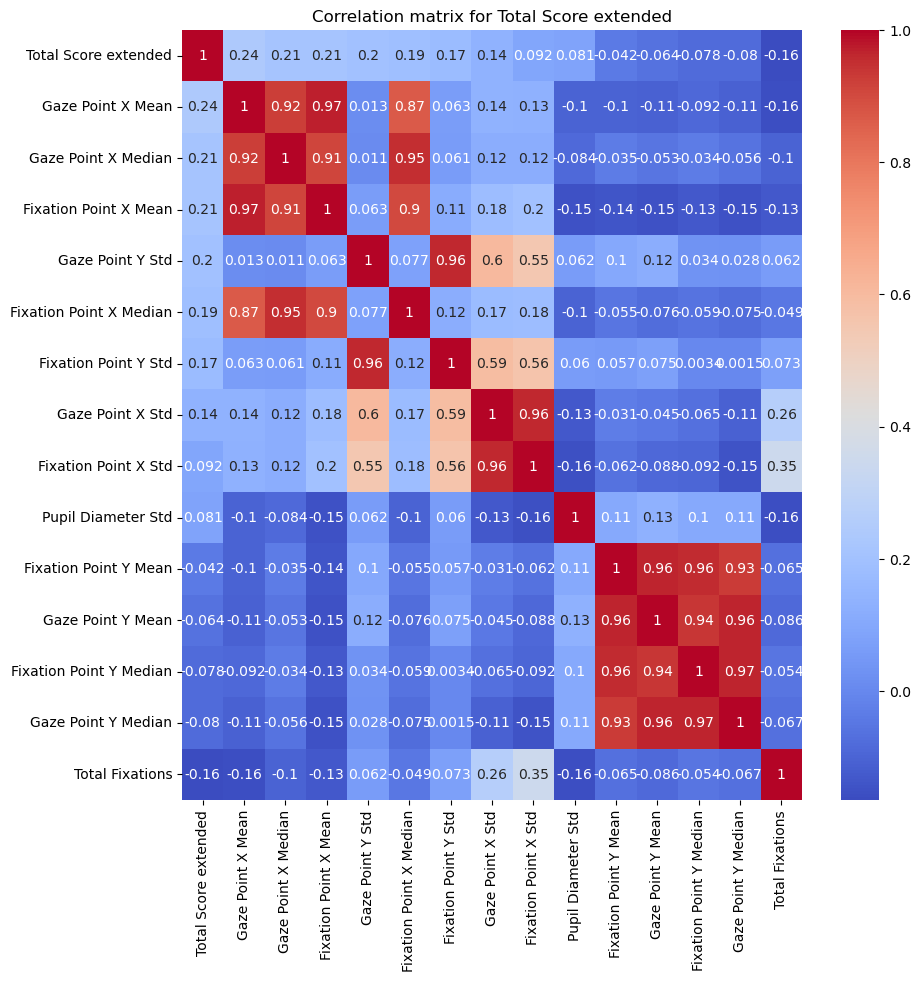

In [30]:
plot_correlation_heatmap(control_df, 'Total Score extended', top_n=15)

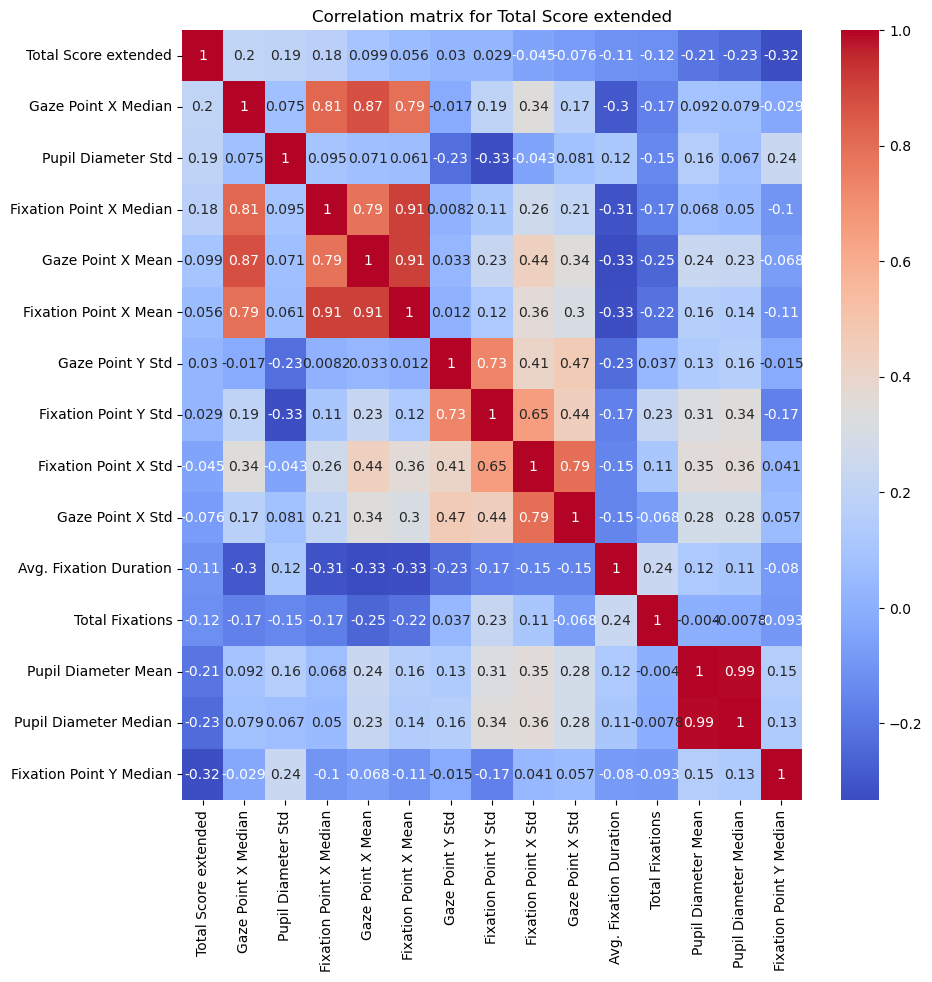

In [31]:
plot_correlation_heatmap(test_df, 'Total Score extended', top_n=15)

# Modeling

Function "train_and_evalute" a "RandomForestRegressor" model using "Group K-Fold cross-validation" to predict empathy scores from the given dataset, and it evaluates the model's performance using various metrics. The primary goal is to predict empathy scores based on the features provided in the dataset. The function accepts two parameters: data_df and group_name.

# Experiment 1 with all important features

# Control Group

Train and evaluate the participant control group to predict empathy.

In [32]:
results_control = train_and_evalute(control_df, "Control Group")


Fold 1:
  Participant Name: Participant0002, Orignal Empathy Score: 127, Predicted empathy Score: 124.41
  Participant Name: Participant0002, Orignal Empathy Score: 127, Predicted empathy Score: 122.32
  Participant Name: Participant0002, Orignal Empathy Score: 127, Predicted empathy Score: 108.69
  Participant Name: Participant0002, Orignal Empathy Score: 127, Predicted empathy Score: 126.65
  Participant Name: Participant0002, Orignal Empathy Score: 127, Predicted empathy Score: 124.41
  Participant Name: Participant0002, Orignal Empathy Score: 127, Predicted empathy Score: 122.32
  Participant Name: Participant0002, Orignal Empathy Score: 127, Predicted empathy Score: 108.69
  Participant Name: Participant0002, Orignal Empathy Score: 127, Predicted empathy Score: 126.65
  Participant Name: Participant0002, Orignal Empathy Score: 127, Predicted empathy Score: 124.41
  Participant Name: Participant0002, Orignal Empathy Score: 127, Predicted empathy Score: 122.32
  Participant Name: Pa

In [33]:
results_control.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Participant Name         142 non-null    object 
 1   Original Empathy Score   142 non-null    object 
 2   Predicted Empathy Score  142 non-null    float64
dtypes: float64(1), object(2)
memory usage: 3.5+ KB


### perfect prediction line with Control Group

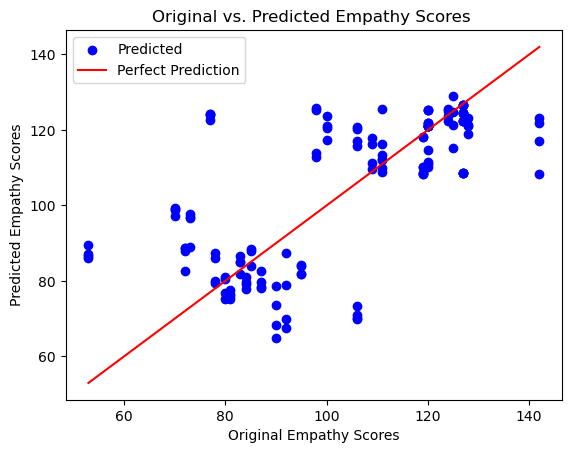

In [34]:
plot_actual_vs_predicted(results_control)

# Test Group

Train and evaluate the participant test group to predict empathy.

In [35]:
results_test = train_and_evalute(test_df, "Test Group")

Fold 1:
  Participant Name: Participant0001, Orignal Empathy Score: 137, Predicted empathy Score: 125.91
  Participant Name: Participant0001, Orignal Empathy Score: 137, Predicted empathy Score: 127.45
  Participant Name: Participant0001, Orignal Empathy Score: 137, Predicted empathy Score: 129.47
  Participant Name: Participant0001, Orignal Empathy Score: 137, Predicted empathy Score: 127.32
  Participant Name: Participant0001, Orignal Empathy Score: 137, Predicted empathy Score: 128.67
  Participant Name: Participant0001, Orignal Empathy Score: 137, Predicted empathy Score: 128.86
  Participant Name: Participant0001, Orignal Empathy Score: 137, Predicted empathy Score: 129.15
  Participant Name: Participant0001, Orignal Empathy Score: 137, Predicted empathy Score: 127.12
  Participant Name: Participant0001, Orignal Empathy Score: 137, Predicted empathy Score: 125.91
  Participant Name: Participant0001, Orignal Empathy Score: 137, Predicted empathy Score: 127.45
  Participant Name: Pa

### perfect prediction line with Test Group

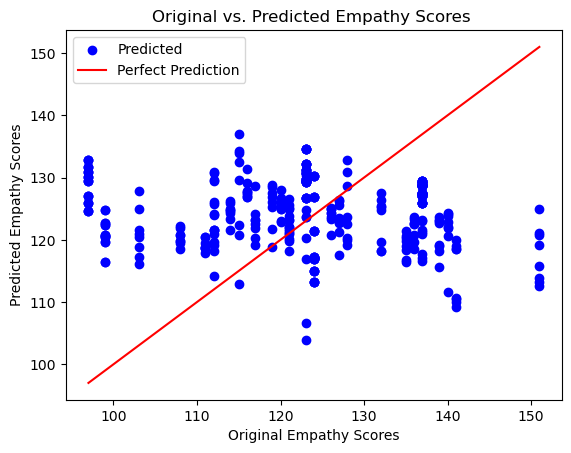

In [36]:
plot_actual_vs_predicted(results_test)

## Calculate the average predicted empathy score for each participant.

#### Calculate the average empathy score for each participant's trial to determine the overall predicted empathy.

In [37]:
# Group by 'Participant Name' and compute the mean and original score values
results_test_mean = results_test.groupby('Participant Name').agg({'Original Empathy Score': 'first', 'Predicted Empathy Score': 'mean'})

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Print all values of the DataFrame
print(results_test_mean)


                 Original Empathy Score  Predicted Empathy Score
Participant Name                                                
Participant0001                     137                127.99375
Participant0003                     123                130.49250
Participant0005                     124                119.76125
Participant0007                      97                129.08625
Participant0009                      99                120.97000
Participant0011                     151                117.64750
Participant0013                     117                122.89250
Participant0015                     137                120.15500
Participant0017                     123                118.76500
Participant0019                     112                127.58125
Participant0021                     114                124.47250
Participant0023                     141                114.51875
Participant0025                     120                125.24750
Participant0027          

In [38]:
# Group by 'Participant Name' and compute the mean and original score values
results_control_mean = results_control.groupby('Participant Name').agg({'Original Empathy Score': 'first', 'Predicted Empathy Score': 'mean'})

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Print all values of the DataFrame
print(results_control_mean)


                 Original Empathy Score  Predicted Empathy Score
Participant Name                                                
Participant0002                     127                 120.5175
Participant0004                     120                 122.2525
Participant0006                     119                 111.2425
Participant0008                      98                 119.4275
Participant0010                     100                 120.6000
Participant0012                     124                 124.1100
Participant0014                     128                 121.1100
Participant0016                     106                 118.4625
Participant0018                     111                 115.0200
Participant0020                     142                 117.5950
Participant0022                     125                 122.6225
Participant0024                     120                 111.9075
Participant0026                     111                 112.7200
Participant0028          

# Experiment 2 with pupil dilation only

# Control Group (pupil)

Train and evaluate the pupil features of the participant control group to predict empathy.

In [39]:
pupil_results_control = train_and_evalute(pupil_control_df, "Control Group")

Fold 1:
  Participant Name: Participant0002, Orignal Empathy Score: 127, Predicted empathy Score: 119.21
  Participant Name: Participant0002, Orignal Empathy Score: 127, Predicted empathy Score: 122.62
  Participant Name: Participant0002, Orignal Empathy Score: 127, Predicted empathy Score: 119.72
  Participant Name: Participant0002, Orignal Empathy Score: 127, Predicted empathy Score: 125.88
  Participant Name: Participant0002, Orignal Empathy Score: 127, Predicted empathy Score: 119.21
  Participant Name: Participant0002, Orignal Empathy Score: 127, Predicted empathy Score: 122.62
  Participant Name: Participant0002, Orignal Empathy Score: 127, Predicted empathy Score: 119.72
  Participant Name: Participant0002, Orignal Empathy Score: 127, Predicted empathy Score: 125.88
  Participant Name: Participant0002, Orignal Empathy Score: 127, Predicted empathy Score: 119.21
  Participant Name: Participant0002, Orignal Empathy Score: 127, Predicted empathy Score: 122.62
  Participant Name: Pa

# Test Group (pupil)

Train and evaluate the pupil features of the participant test group to predict empathy.

In [40]:
pupil_results_test = train_and_evalute(pupil_test_df, "Test Group")

Fold 1:
  Participant Name: Participant0001, Orignal Empathy Score: 137, Predicted empathy Score: 122.57
  Participant Name: Participant0001, Orignal Empathy Score: 137, Predicted empathy Score: 122.25
  Participant Name: Participant0001, Orignal Empathy Score: 137, Predicted empathy Score: 122.55
  Participant Name: Participant0001, Orignal Empathy Score: 137, Predicted empathy Score: 122.57
  Participant Name: Participant0001, Orignal Empathy Score: 137, Predicted empathy Score: 122.43
  Participant Name: Participant0001, Orignal Empathy Score: 137, Predicted empathy Score: 122.42
  Participant Name: Participant0001, Orignal Empathy Score: 137, Predicted empathy Score: 123.04
  Participant Name: Participant0001, Orignal Empathy Score: 137, Predicted empathy Score: 122.59
  Participant Name: Participant0001, Orignal Empathy Score: 137, Predicted empathy Score: 122.57
  Participant Name: Participant0001, Orignal Empathy Score: 137, Predicted empathy Score: 122.25
  Participant Name: Pa

# Final Remarks

The comprehensive prediction, encompassing all features as well as exclusively concentrating on pupillary dilation, does not demonstrate substantial relevance. Gaze typing based on experience continues to exhibit superior predictive potential; however, the dataset reveals certain discrepancies in compliance with the protocols delineated. 
Despite its potential, certain limitations need to be addressed, such as the limited sample size, the narrow scope of eye-tracking features assessed, and the utilization of single empathy scores across multiple trials. Addressing these limitations will enable the full realization of the benefits offered by eye-tracking data in empathy assessment. By addressing the identified limitations and implementing the suggested recommendations, the capacity to assess empathy in HR recruitment processes can be significantly enhanced.These supplementary indicators will provide a more holistic evaluation of empathy in HR recruitment contexts.

In [41]:
# **Note** There is an issue with the participant name column with diffrent files for example specifically in the file "Participant0011". 
# The image name "EyeT_group_dataset_III_image_name_letter_card_participant_11_trial_0" has been incorrectly 
# labeled as "Participant0001". 

# *** Assumption ***
# It is assumed that this is not error becasue I have follow the naming convention mentioned in the paper
# + EyeT_group_AAA_image_name_BBB_participant_CCC_trial_DDD.csv + 
# which was followed during the process of generating files.